In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root = "sfh_100_10_20251120_104808"
real = np.vstack(10**(np.load(f"/data/mustard/vmehta/{root}/snr__all_true.npy")))

def load_data(sigma):
    if sigma == None:
        pred = np.vstack(10**(np.load(f"/data/mustard/vmehta/{root}/snr__all_pred.npy")))
    else:
        pred = np.vstack(10**(np.load(f"/data/mustard/vmehta/{root}/snr__all_pred_sigma_{sigma}.npy")))

    return pred

# Bin setup (used in multiple places)
bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

def plot_diff(pred):
    diff = pred - real

    median = np.median(diff, axis=0)
    sixteen = np.percentile(diff, 16, axis=0)
    eightyfour = np.percentile(diff, 84, axis=0)

    plt.figure(figsize=(10,5))
    plt.errorbar(10**(bin_centers), median, yerr=[median - sixteen, eightyfour - median], fmt='ok', capsize=5)
    plt.xlabel('$t_\\mathrm{lookback}$ (years)')
    plt.ylabel('$\\Delta{\\ell}_\\mathrm{SFH}$')
    plt.xscale('log')
    plt.show()
    return

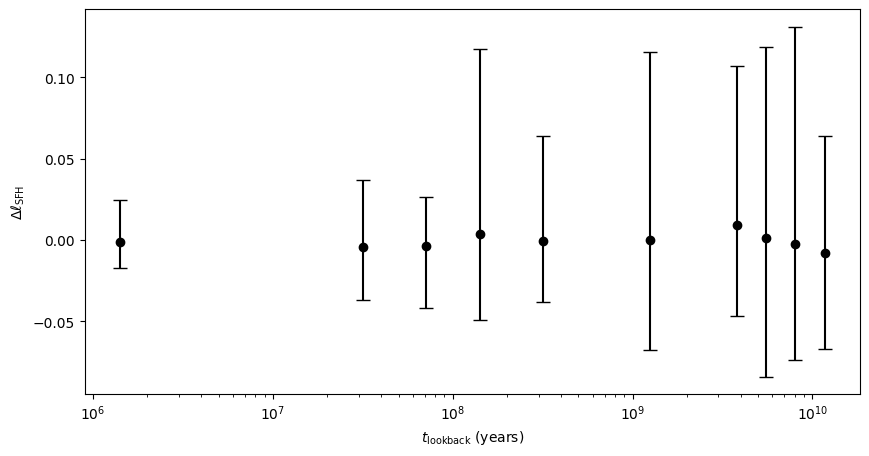

In [3]:
plot_diff(load_data(sigma=None))

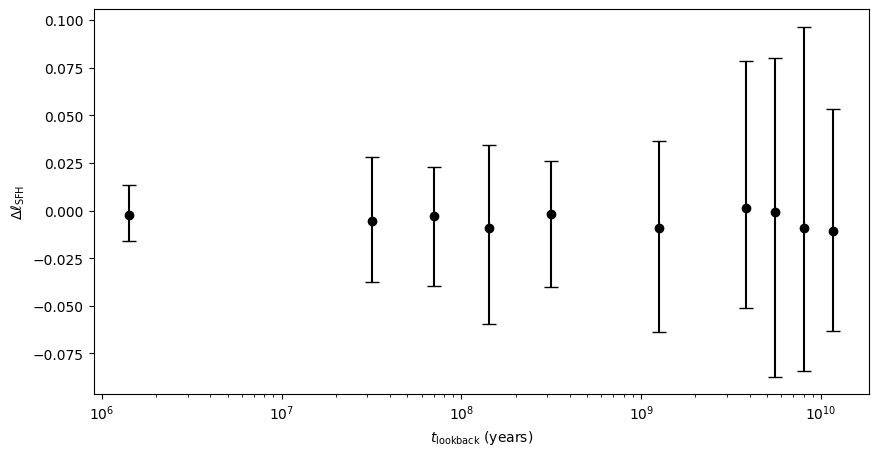

In [4]:
plot_diff(load_data(sigma="0_1"))

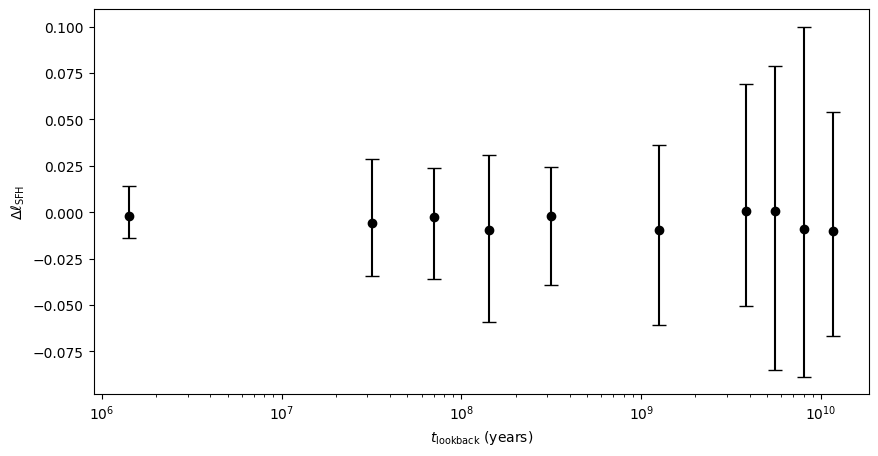

In [5]:
plot_diff(load_data(sigma="0_0_1"))

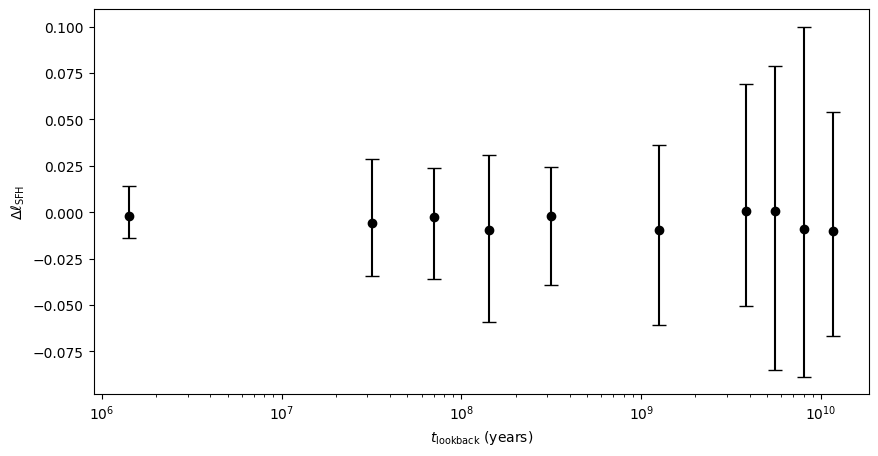

In [28]:
plot_diff(load_data(sigma="0_0_0_1"))

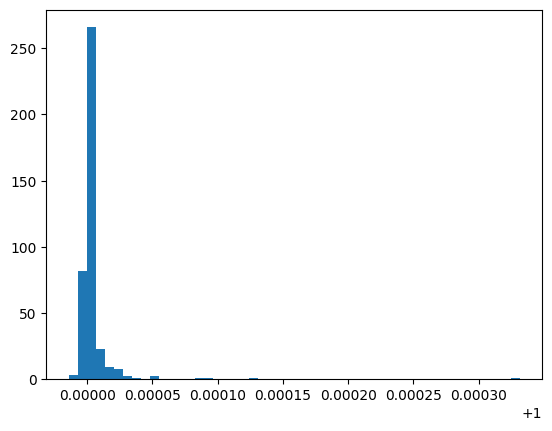

In [27]:
# having a look at some of the distributions
sigma = "0_1"
label_sum = np.sum(load_data(sigma=sigma), axis=1)
plt.hist(label_sum, bins=50)
#plt.xscale('log')
plt.show()